In [287]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
df = pd.read_csv('data/Revenue.csv')
df_app = pd.read_csv('data/App.csv')
df_campany = pd.read_csv('data/Campaign.csv')

In [49]:
df = df.merge(df_app, left_on='app_id', right_on='app_id')
df = df.merge(df_campany, left_on='campaign_id', right_on='id')

In [50]:
df = df.drop(['app_id', 'campaign_id', 'id'], axis=1)

In [56]:
df['date'] = pd.to_datetime(df['date'],format='%m/%d/%Y')

In [79]:
df.columns = ['date', 'revenue', 'app', 'company']

In [80]:
# task 0
df.groupby('date')['revenue'].sum()

date
2018-01-01    187.967204
2018-01-02    292.252849
2018-01-03    274.893990
2018-01-04    218.088951
2018-01-05    176.735804
2018-01-06    190.000919
2018-01-07    271.068202
2018-01-08    378.515240
2018-01-09    214.917807
2018-01-10    180.422695
2018-01-11    200.014414
2018-01-12    272.460494
2018-01-13    163.251806
2018-01-14    283.764542
2018-01-15    284.182413
2018-01-16    153.028238
2018-01-17    253.624809
2018-01-18    146.213579
2018-01-19    338.447491
2018-01-20    293.328405
2018-01-21    241.907450
2018-01-22    338.264468
2018-01-23    205.516873
2018-01-24    270.352710
2018-01-25    271.672013
2018-01-26    246.536089
2018-01-27    176.303185
2018-01-28    129.140234
2018-01-29     94.253583
2018-01-30    305.455059
2018-01-31    245.190381
2018-02-01    335.104582
2018-02-02    239.378891
2018-02-03    191.919179
2018-02-04    206.957709
2018-02-05    245.238558
2018-02-06    194.349368
2018-02-07    416.830686
2018-02-08    311.600250
2018-02-09    273.54

In [81]:
#task 1
df.groupby('date')['revenue'].sum().sort_values()[-1:]

date
2018-02-07    416.830686
Name: revenue, dtype: float64

In [82]:
# task 2
df.groupby('date')['revenue'].sum().sort_values()[-2:-1]

date
2018-02-11    381.080422
Name: revenue, dtype: float64

In [87]:
#task 3
df[df.date > '2018-01-31'].groupby('company')['revenue'].sum()[:1]

company
Gis1    4043.574224
Name: revenue, dtype: float64

In [123]:
#task 4
df.groupby([df.date.dt.month.rename('month'), df.date.dt.week.rename('week'), 'company'])['revenue'].sum()

month  week  company
1      1     Gis1        907.529466
             Gis2        406.431283
             Gis3        297.047170
       2     Gis1       1071.694675
             Gis2        357.270029
             Gis3        264.382295
       3     Gis1        977.829368
             Gis2        308.539546
             Gis3        424.363472
       4     Gis1       1032.094587
             Gis2        363.492751
             Gis3        242.198235
       5     Gis1        380.802963
             Gis2        149.299070
             Gis3        114.796990
2      5     Gis1        551.701424
             Gis2        136.403054
             Gis3        285.255884
       6     Gis1       1092.097582
             Gis2        523.960164
             Gis3        392.382654
       7     Gis1       1128.816954
             Gis2        260.966116
             Gis3        354.779031
       8     Gis1        965.412262
             Gis2        284.285718
             Gis3        288.027837
       

In [128]:
#task 5
df[(df.date > '2018-01-14') & (df.date < '2018-02-16')].groupby('app')['revenue'].mean()

app
DrumPads     50.709972
Guitar       47.810127
Karaoke      52.611764
Metronome    51.869209
Paino        47.075848
Name: revenue, dtype: float64

In [141]:
# task 6
df.groupby(df.date.dt.week)['revenue'].sum().sort_values(ascending=False)[:1]

date
6    2008.4404
Name: revenue, dtype: float64

In [219]:
# task 7
df['month'] = df.date.dt.month
df['week'] = df.date.dt.week
df['day_of_week'] = df.date.dt.dayofweek + 1

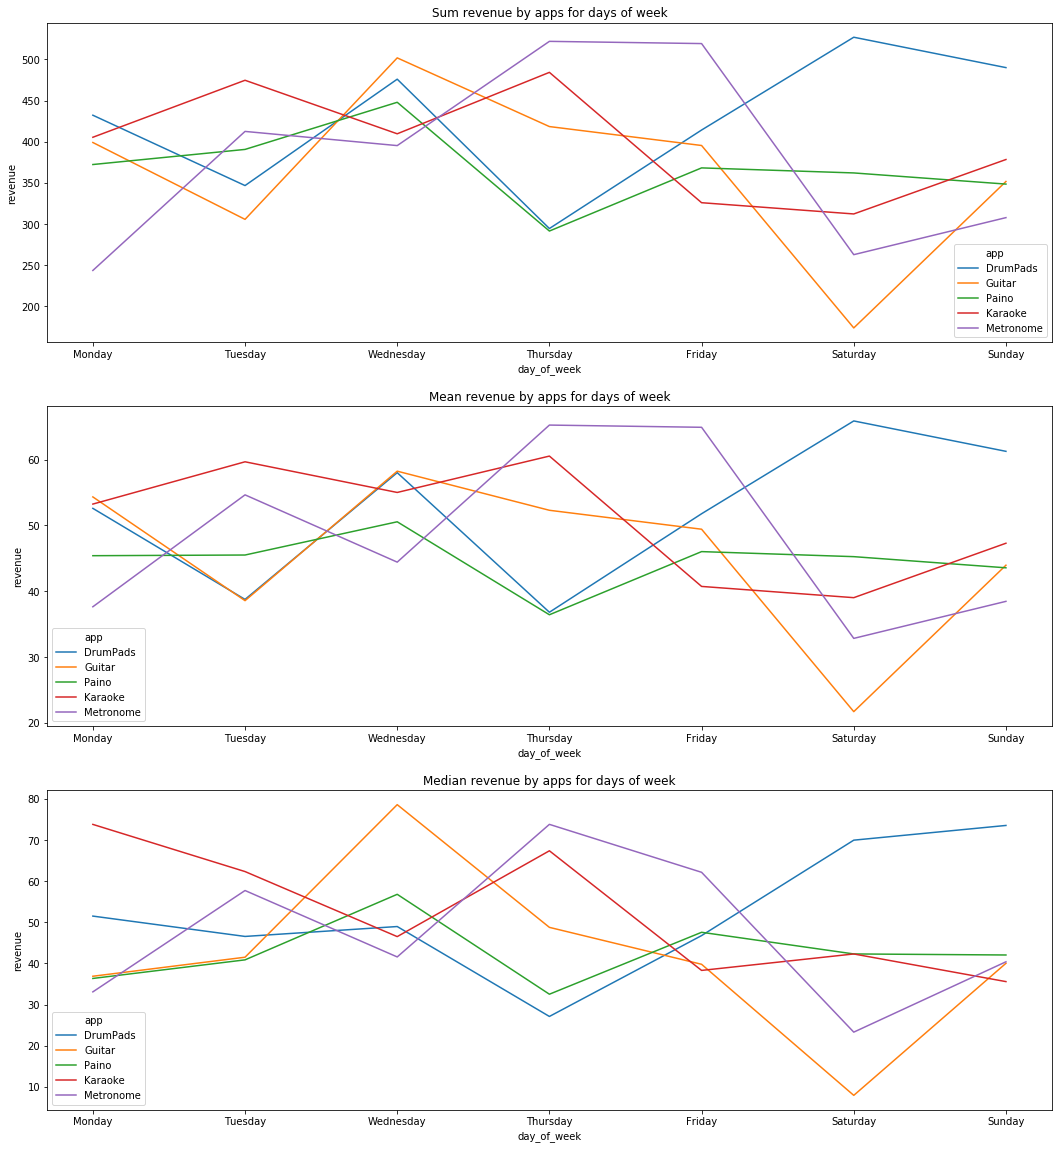

In [321]:
fig, ax = plt.subplots(3,1, figsize=[18,20])

pict_1 = sns.lineplot(x='day_of_week',
                      y='revenue', 
                      data=df[df.date < '2018-02-26'], # чтобы сумма была по одинаковому кол-ву дней(т.е. 8 полных недель)
                      hue='app',
                      estimator=np.sum,
                      ci=None,
                      markers=True,
                      ax=ax[0])
pict_1.set(xticklabels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
           xticks=df.day_of_week.unique(),
           title='Sum revenue by apps for days of week');

pict_2 = sns.lineplot(x='day_of_week',
                      y='revenue', 
                      data=df,
                      hue='app',
                      estimator=np.mean,
                      ci=None,
                      markers=True,
                      ax=ax[1])
pict_2.set(xticklabels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
           xticks=df.day_of_week.unique(),
           title='Mean revenue by apps for days of week');

pict_3 = sns.lineplot(x='day_of_week',
                      y='revenue', 
                      data=df,
                      hue='app',
                      estimator=np.median,
                      ci=None,
                      markers=True,
                      ax=ax[2])
pict_3.set(xticklabels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
           xticks=df.day_of_week.unique(),
           title='Median revenue by apps for days of week');


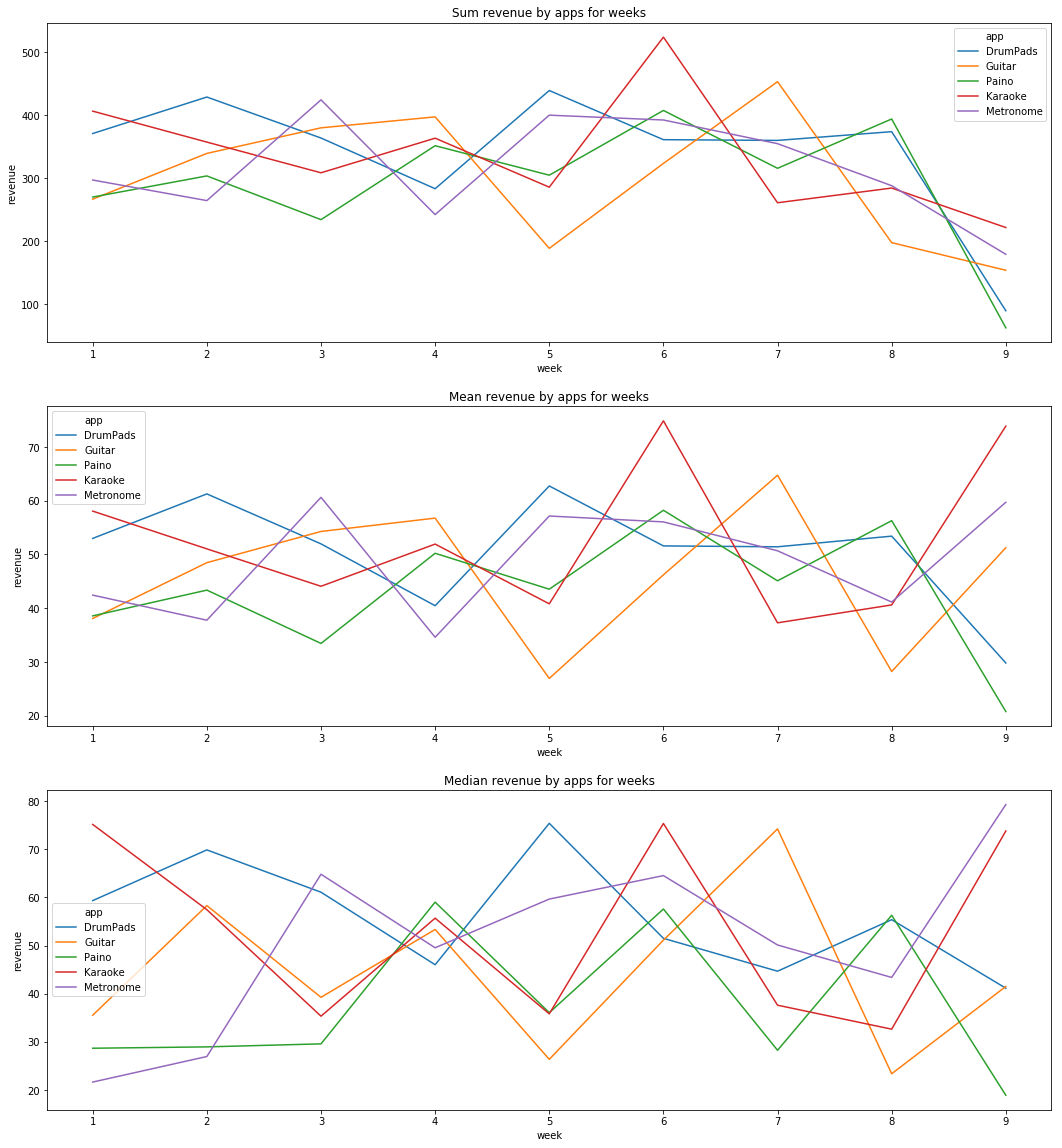

In [322]:
fig, ax = plt.subplots(3,1, figsize=[18,20])

pict_1 = sns.lineplot(x='week',
                      y='revenue', 
                      data=df,
                      hue='app',
                      estimator=np.sum,
                      ci=None,
                      markers=True,
                      ax=ax[0])
pict_1.set(xticklabels=list(range(1,10)),
           xticks=df.week.unique(),
           title='Sum revenue by apps for weeks');

pict_2 = sns.lineplot(x='week',
                      y='revenue', 
                      data=df,
                      hue='app',
                      estimator=np.mean,
                      ci=None,
                      markers=True,
                      ax=ax[1])
pict_2.set(xticklabels=list(range(1,10)),
           xticks=df.week.unique(),
           title='Mean revenue by apps for weeks');

pict_3 = sns.lineplot(x='week',
                      y='revenue', 
                      data=df,
                      hue='app',
                      estimator=np.median,
                      ci=None,
                      markers=True,
                      ax=ax[2])
pict_3.set(xticklabels=list(range(1,10)),
           xticks=df.week.unique(),
           title='Median revenue by apps for weeks');

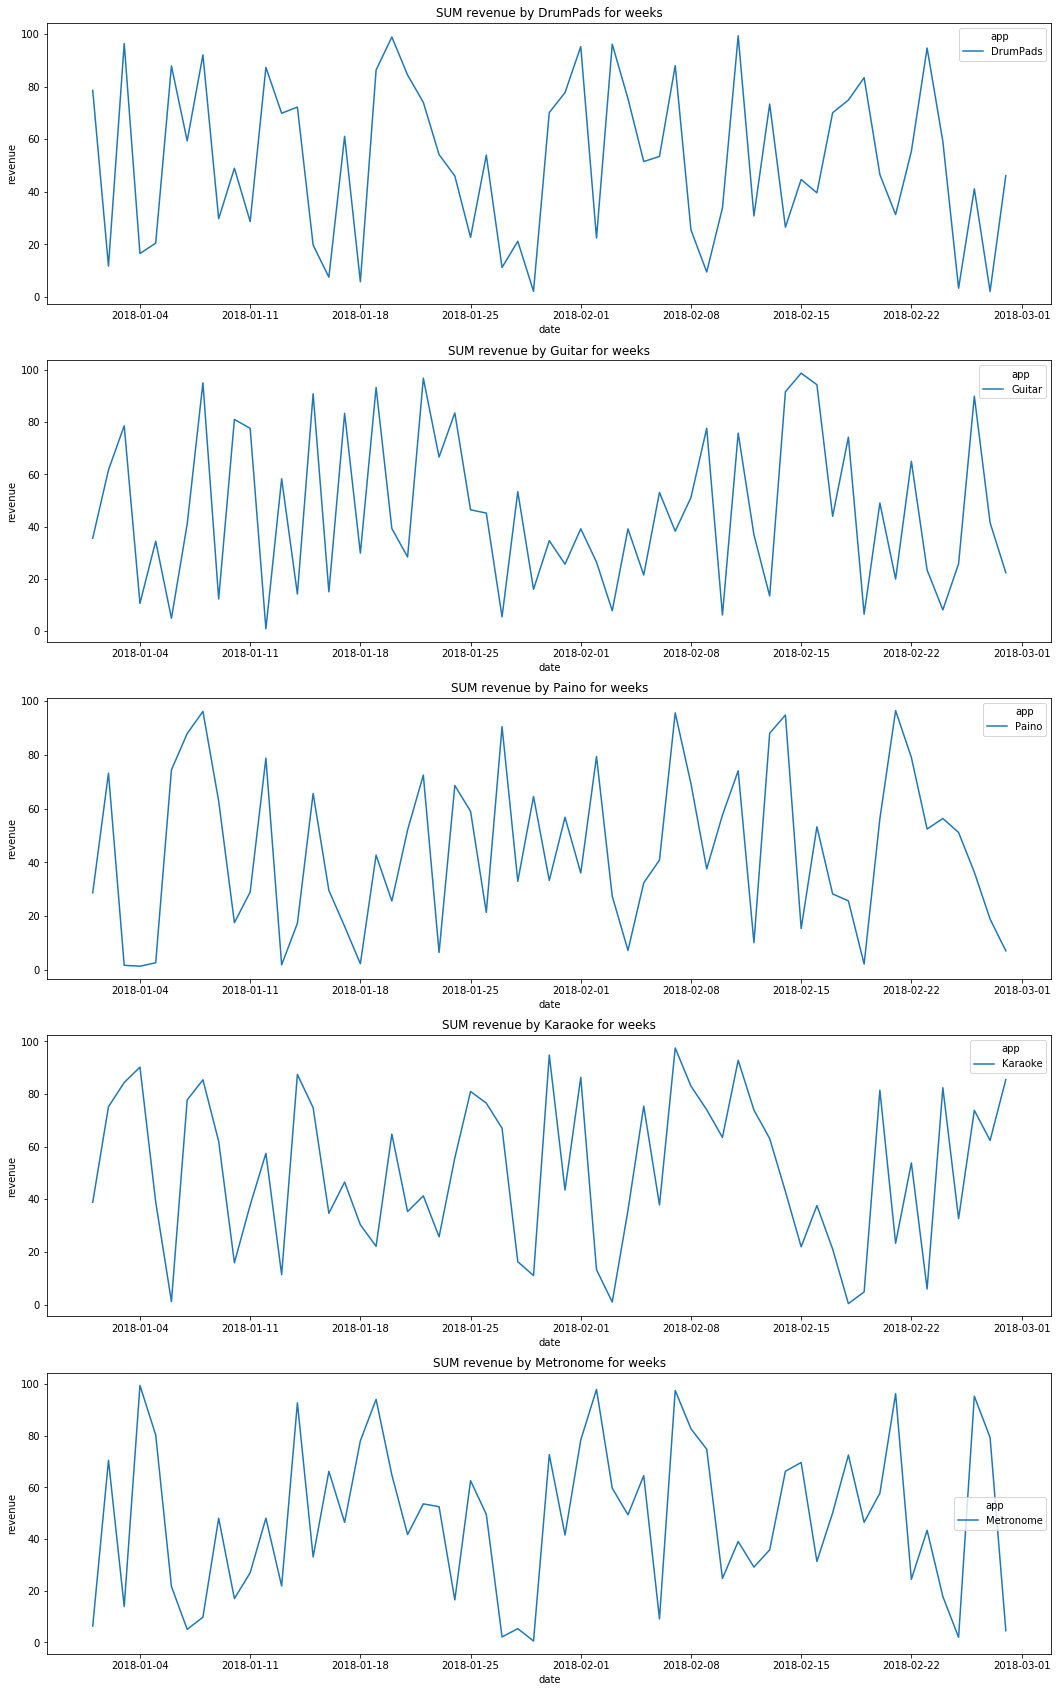

In [312]:
fig, ax = plt.subplots(5,1, figsize=[18,30])

pict_1 = sns.lineplot(x='date',
                      y='revenue', 
                      data=df[df.app == 'DrumPads'],
                      hue='app',
                      estimator=np.sum,
                      ci=None,
                      markers=True,
                      ax=ax[0])
pict_1.set(title='SUM revenue by DrumPads for weeks');

pict_2 = sns.lineplot(x='date',
                      y='revenue', 
                      data=df[df.app == 'Guitar'],
                      hue='app',
                      estimator=np.sum,
                      ci=None,
                      markers=True,
                      ax=ax[1])
pict_2.set(title='SUM revenue by Guitar for weeks');

pict_3 = sns.lineplot(x='date',
                      y='revenue', 
                      data=df[df.app == 'Paino'],
                      hue='app',
                      estimator=np.sum,
                      ci=None,
                      markers=True,
                      ax=ax[2])
pict_3.set(title='SUM revenue by Paino for weeks');

pict_4 = sns.lineplot(x='date',
                      y='revenue', 
                      data=df[df.app == 'Karaoke'],
                      hue='app',
                      estimator=np.sum,
                      ci=None,
                      markers=True,
                      ax=ax[3])
pict_4.set(title='SUM revenue by Karaoke for weeks');

pict_4 = sns.lineplot(x='date',
                      y='revenue', 
                      data=df[df.app == 'Metronome'],
                      hue='app',
                      estimator=np.sum,
                      ci=None,
                      markers=True,
                      ax=ax[4])
pict_4.set(title='SUM revenue by Metronome for weeks');

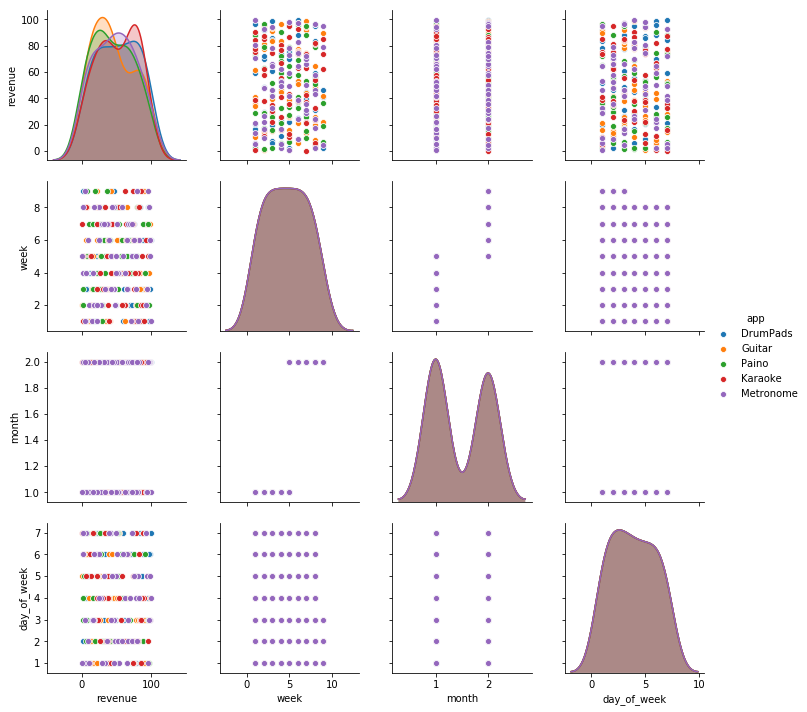

In [320]:
sns.pairplot(df, hue="app")

# Заключение

  Приложения Guitar, Karaoke, Metronome и Paino приносят в среднем в будни дни больше, нежели в выходные, а приложение DrumPads наоборот, имеет больший доход в выходные дни. Если принять, что стоимость приложений одинаковая(или услуг в них), то по графику "Sum revenue by apps for days of week" можно судить о популярности приложений по дням недели.

